In [690]:
a1 = open('a2.txt')
file = a1.readlines()

In [691]:
import re
import numpy as np
import matplotlib.pyplot as plt

p = re.compile('\d+')

data = []

for line in file:
    x, y = p.findall(line)
    data.append([int(x),int(y)])
    
data = np.array(data)

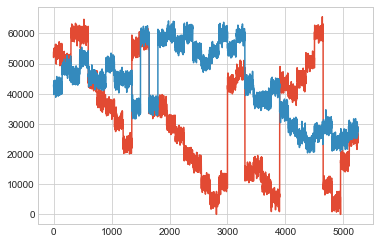

In [692]:
plt.plot(data)

([array([ 1.,  0.,  0.,  0.,  2.,  5.,  9.,  6., 11., 22., 21., 16., 18.,
         14.,  6., 17.,  4., 10.,  9., 24., 16., 22., 34., 26., 39., 34.,
         27., 18., 17., 12.,  5.,  5.,  4.,  6.,  8.,  4., 15., 21., 20.,
         22., 25., 12., 19., 28., 22., 27., 27., 22., 15., 13., 18., 15.,
         14., 19., 24., 12., 24., 22., 24., 24., 19., 12., 22., 21., 17.,
         25., 21., 21., 30., 34., 35., 36., 32., 29., 17., 20., 22., 17.,
         17., 40., 48., 52., 62., 63., 57., 51., 42., 39., 32., 22., 18.,
          6.,  8.,  1.,  3.,  5.,  9.,  5.,  4., 11., 15., 14., 17., 16.,
         23., 18.,  6.,  7.,  2.,  0.,  2.,  2.,  6.,  6., 11., 13., 19.,
         25., 17., 23., 21., 30., 21., 21., 30., 19., 31., 26., 24., 34.,
         38., 37., 37., 34., 45., 44., 41., 49., 31., 40., 40., 24., 22.,
         15., 16.,  4.,  2.,  0.,  0.,  1.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

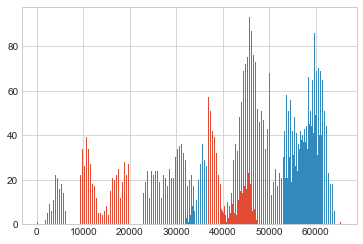

In [358]:
plt.hist(data, bins=150)

In [427]:
type(a)

NoneType

In [430]:
type(a) == None

False

In [435]:
a = None

if np.array([1,2,3]) is None:
    print(1)

In [674]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=800, centroids=None):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.dist_l = []
        self.centroids = centroids
        self.prev_tot_dist = None
        
    def fit(self, data):
        self.dist_l = []
        
        self.data = data
#         self.centroids = {}
        if self.centroids is None :
            self.centroids = {k:v for k,v in enumerate(np.array(random.sample(list(data),self.k)))}
            
#         for i in range(self.k):
#             self.centroids[i] = init_centroids[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
#                     print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))
                    optimized = False
    
            self.dist_l.append(self.calcul_dist())
        
            if optimized:
                break

    def set_prev_tot_dist(self, tot_dist):
        self.prev_tot_dist = tot_dist
        
    def get_reduced_ratio(self):
        return 1-self.dist_l[-1]/self.prev_tot_dist
        
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def calcul_dist(self):
        tot_dist = 0
        for key,val in self.classifications.items():
            for p in val:
                dist = np.linalg.norm(self.centroids[key]-p)
                tot_dist += dist
        return tot_dist
    
    def add_centroid(self):
        max_dist = 0
        max_dist_p = ()
        for p in data:
            sub_min_dist = 10e10
            for c in self.centroids.values():
                if sub_min_dist > np.linalg.norm(c - p):
                    sub_min_dist = np.linalg.norm(c - p)
            if max_dist < sub_min_dist:
#                 print(max_dist, sub_min_dist)
                max_dist = sub_min_dist
                max_dist_p = p
        self.centroids[self.k] = max_dist_p
        self.k += 1
        
    def draw_plot(self):
        import matplotlib.pyplot as plt
        plt.scatter([x for x,y in data],[y for x,y in data])
        plt.scatter([x for x,y in self.centroids.values()], [y for x,y in self.centroids.values()])

In [498]:
model = K_Means(k=20)

model.fit(data)

centroid_x = [v[0] for v in model.centroids.values()]
centroid_y = [v[1] for v in model.centroids.values()]

5925309.236925073


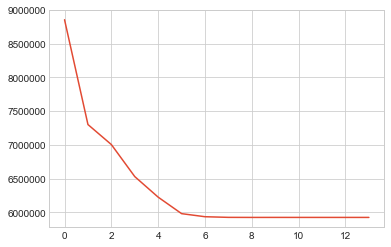

In [499]:
print(model.dist_l[-1])
plt.plot(model.dist_l)

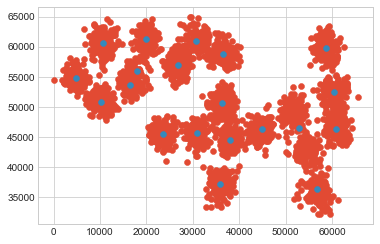

In [500]:
plt.scatter([x for x,y in data],[y for x,y in data])
plt.scatter(centroid_x, centroid_y)

6236397.212839107


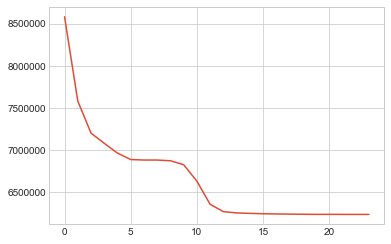

In [501]:
model2 = K_Means(k=20)

model2.fit(data)

centroid_x2 = [v[0] for v in model2.centroids.values()]
centroid_y2 = [v[1] for v in model2.centroids.values()]

print(model2.dist_l[-1])
plt.plot(model2.dist_l)

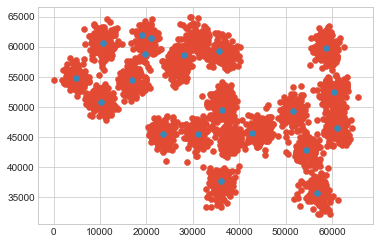

In [502]:
plt.scatter([x for x,y in data],[y for x,y in data])
plt.scatter(centroid_x2, centroid_y2)

In [503]:
dist_dic = {k1:{} for k1,v1 in model.centroids.items()}

for k1,v1 in model.centroids.items():
    for k2,v2 in model2.centroids.items():
        dist_dic[k1][k2] = np.linalg.norm(v1 - v2)

In [504]:
nn_l = []

ban = []

for k1,v1 in dist_dic.items():
    min_idx = None
    min_dist = 10e10
    for k2,v2 in v1.items():
        if k2 not in ban:
            if v2 < min_dist:
                min_dist = v2
                min_idx = k2
    ban.append(min_idx)
    nn_l.append((k1, min_idx))

In [505]:
mdl1_ctr = list(model.centroids.values())
mdl2_ctr = list(model2.centroids.values())


In [506]:
mdl1_x, mdl1_y = [x for x,y in mdl1_ctr], [y for x,y in mdl1_ctr]
mdl2_x, mdl2_y = [x for x,y in mdl2_ctr], [y for x,y in mdl2_ctr]

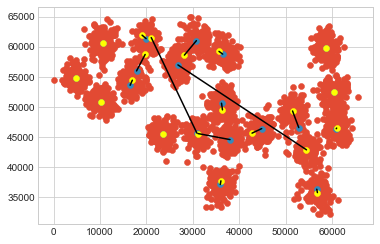

In [507]:
plt.scatter([x for x,y in data],[y for x,y in data])

plt.scatter(centroid_x, centroid_y)
plt.scatter(centroid_x2, centroid_y2, color='yellow')

for d1,d2 in nn_l:
    plt.plot([mdl1_x[d1],mdl2_x[d2]],[mdl1_y[d1],mdl2_y[d2]], color='black')
plt.show()
    

In [508]:
new_init = {}
for idx,(d1,d2) in enumerate(nn_l):
    mid_p = np.array([(mdl1_x[d1] + mdl2_x[d2])/2, (mdl1_y[d1] + mdl2_y[d2])/2])
    new_init[idx] = mid_p

In [509]:
new_init

{0: array([16728.59684893, 53993.0544275 ]),
 1: array([23495.15540541, 45438.83783784]),
 2: array([ 4770.2972973 , 54722.59459459]),
 3: array([36270.50423687, 50027.66208493]),
 4: array([18799.08751609, 57328.11068211]),
 5: array([29465.05314685, 59792.67482517]),
 6: array([52127.79365373, 47905.80672843]),
 7: array([19498.22355422, 61622.00993451]),
 8: array([60913.73288152, 46386.2781287 ]),
 9: array([10325.34210526, 50846.02631579]),
 10: array([43780.08114931, 45976.77782505]),
 11: array([35972.03377677, 37353.93839885]),
 12: array([34540.91355272, 45025.45395107]),
 13: array([60331.40397351, 52416.39735099]),
 14: array([56745.57690157, 35979.0677333 ]),
 15: array([36022.26982019, 58984.74507411]),
 16: array([58641.16, 59852.84]),
 17: array([25951.45988943, 53556.71640049]),
 18: array([10595.53333333, 60619.72      ]),
 19: array([40619.66866233, 49889.76941498])}

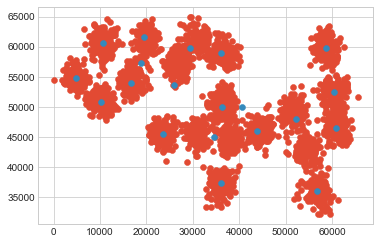

In [510]:
plt.scatter([x for x,y in data],[y for x,y in data])
plt.scatter([x for x,y in new_init.values()],[y for x,y in new_init.values()])

5926768.193543805


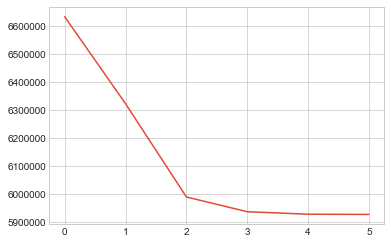

In [513]:
model4 = K_Means(k=20, centroids=new_init)

model4.fit(data)

centroid_x4 = [v[0] for v in model4.centroids.values()]
centroid_y4 = [v[1] for v in model4.centroids.values()]

print(model4.dist_l[-1])
plt.plot(model4.dist_l)

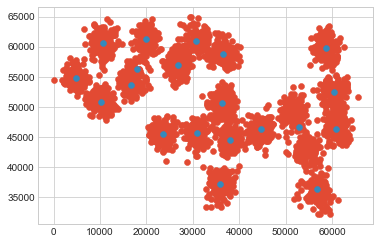

In [514]:
plt.scatter([x for x,y in data],[y for x,y in data])
plt.scatter(centroid_x4, centroid_y4)

# Automatically choose number of K

하나씩 늘리되, 일정 비율이상 좋아지지 않으면 그만둔다.
하나씩 늘리는 방법은 클러스터와 가장 먼 데이터에 새로운 initial point을 두는 것이다.

In [699]:
model5 = K_Means(k=2)
model5.fit(data)


In [700]:
model5.prev_tot_dist

[    0 22078]


/Users/hyunwoo/anaconda3/envs/optlab/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide


[58643 62544]
[   17 53801]
[65535 27368]
[    0 22078]
[    0 22078]
[46861 63137]
[60861 60660]
[   17 53801]
[  949 44830]
[48716 20467]
[   17 53801]
[56458 62279]
[ 8531 62942]
[25500 47603]
[49043 34993]
[62728 24002]
[    0 22078]
[40641 23826]
[   17 53801]
[25878 52642]
[27364 31768]
[  949 44830]
[29076 64142]
[52559 52735]
[17769 34464]
[18871 51566]
[49313 41972]
[51139 59585]
[62141 43026]
[36144 28076]
[30491 41203]
[31544 51040]
[49043 34993]


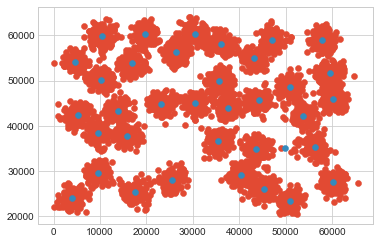

In [701]:
strike = 0
while True:
    prev_tot_dist = model5.dist_l[-1]
    model5.set_prev_tot_dist(prev_tot_dist)

    model5.add_centroid()

    model5.fit(data)
    reduced_ratio = model5.get_reduced_ratio()
    if reduced_ratio < 0.03:
        strike += 1
    if strike >= 3:
        break
model5.draw_plot()

# Check assiciation of fitness and K-number 

In [469]:
best_dist_l = []
for i in range(1,40):
    model3 = K_Means(k=i)

    model3.fit(data)

    best_dist_l.append(model3.dist_l[-1])

optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!
optimized!


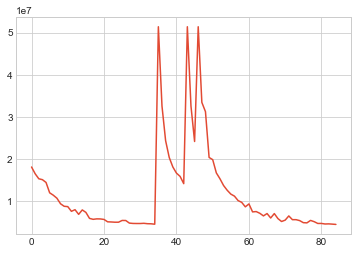

In [470]:
plt.plot(best_dist_l)

# Scikit learn k-means

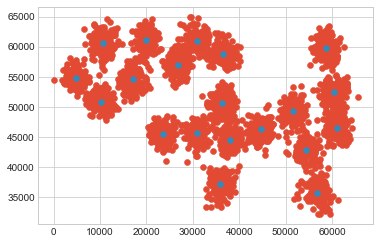

In [678]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0).fit(data)
sk_centroids = kmeans.cluster_centers_

plt.scatter([x for x,y in data],[y for x,y in data])
plt.scatter([x for x,y in sk_centroids], [y for x,y in sk_centroids])